In [ ]:
!unzip /content/drive/MyDrive/dataset.zip -d images/

Archive:  /content/drive/MyDrive/dataset.zip
   creating: images/dataset/
   creating: images/dataset/train/
   creating: images/dataset/train/Bird_Drop/
  inflating: images/dataset/train/Bird_Drop/Bird (1).jpeg  
  inflating: images/dataset/train/Bird_Drop/Bird (10).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (100).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (101).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (102).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (103).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (104).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (105).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (106).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (107).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (108).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (109).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (11).jpg  
  inflating: images/dataset/train/Bird_Drop/Bird (110).j

In [ ]:
!unzip /content/drive/MyDrive/test.zip -d images/

Archive:  /content/drive/MyDrive/test.zip
   creating: images/test/
   creating: images/test/Bird_drop/
  inflating: images/test/Bird_drop/Bird (173).jpg  
  inflating: images/test/Bird_drop/Bird (174).jpg  
  inflating: images/test/Bird_drop/Bird (175).jpg  
  inflating: images/test/Bird_drop/Bird (176).jpg  
  inflating: images/test/Bird_drop/Bird (177).jpg  
  inflating: images/test/Bird_drop/Bird (178).jpg  
  inflating: images/test/Bird_drop/Bird (179).JPG  
  inflating: images/test/Bird_drop/Bird (180).jpg  
  inflating: images/test/Bird_drop/Bird (181).jpg  
  inflating: images/test/Bird_drop/Bird (182).jpg  
  inflating: images/test/Bird_drop/Bird (183).jpg  
  inflating: images/test/Bird_drop/Bird (184).jpg  
  inflating: images/test/Bird_drop/Bird (185).jpg  
  inflating: images/test/Bird_drop/Bird (186).jpg  
  inflating: images/test/Bird_drop/Bird (187).jpg  
  inflating: images/test/Bird_drop/Bird (188).jpg  
  inflating: images/test/Bird_drop/Bird (189).jpg  
  inflating:

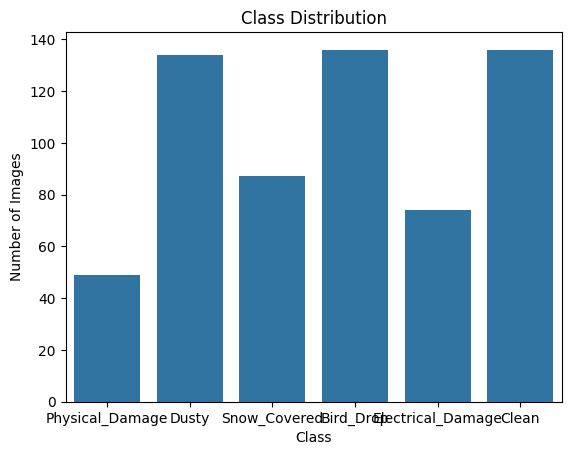

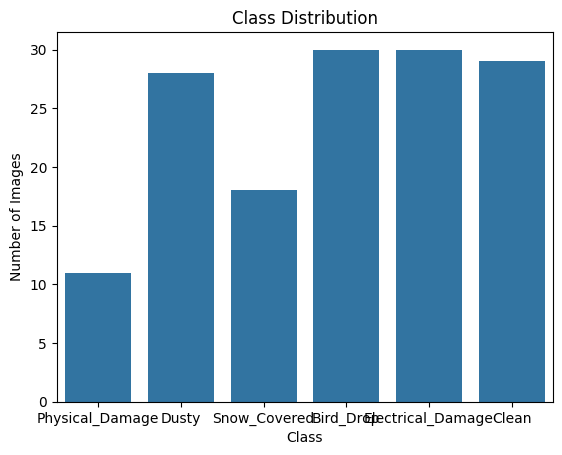

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import seaborn as sns

image_dir = "images/dataset/train"  # path to your image folder
image_dir_v = "images/dataset/val"
# 1. Class Distribution
classes = os.listdir(image_dir)
class_counts = {cls: len(os.listdir(os.path.join(image_dir, cls))) for cls in classes}

# Plot class distribution
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# 1.a. Class Distribution
classes = os.listdir(image_dir_v)
class_counts = {cls: len(os.listdir(os.path.join(image_dir_v, cls))) for cls in classes}

# Plot class distribution
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


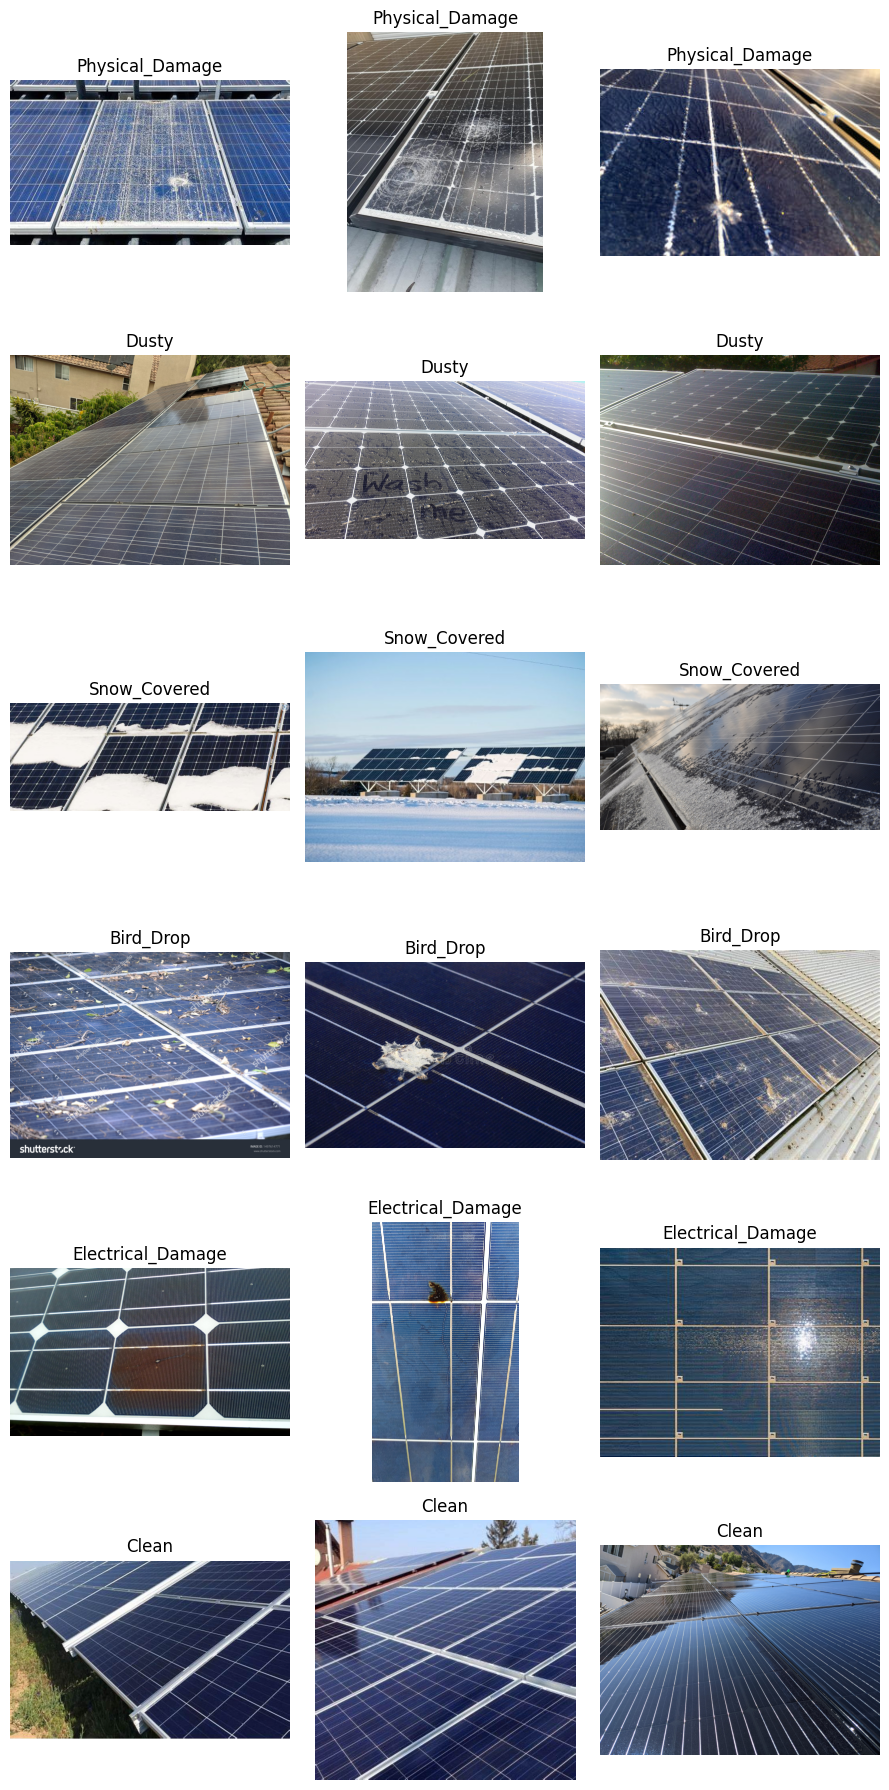

In [ ]:
# 2. Display Sample Images per Class
def show_images_per_class(image_dir, classes, n=3):
    plt.figure(figsize=(n * 3, len(classes) * 3))
    for i, cls in enumerate(classes):
        class_path = os.path.join(image_dir, cls)
        images = os.listdir(class_path)[:n]
        for j, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            plt.subplot(len(classes), n, i * n + j + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(cls)
    plt.tight_layout()
    plt.show()

show_images_per_class(image_dir, classes)

In [ ]:
# 3. Image Size and Channel Info
widths, heights, channels = [], [], []
for cls in classes:
    for img_name in os.listdir(os.path.join(image_dir, cls))[:20]:  # check 20 images per class
        img_path = os.path.join(image_dir, cls, img_name)
        img = Image.open(img_path)
        w, h = img.size
        widths.append(w)
        heights.append(h)
        channels.append(len(img.getbands()))

print(f"Avg Width: {np.mean(widths):.2f}, Avg Height: {np.mean(heights):.2f}")
print(f"Image Modes (Channels):", set(channels))

Avg Width: 1028.59, Avg Height: 824.63
Image Modes (Channels): {3, 4}


In [ ]:
from PIL import UnidentifiedImageError
import numpy as np

r_vals, g_vals, b_vals = [], [], []

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')  # Add formats as needed

for cls in classes:
    folder_path = os.path.join(image_dir, cls)
    for img_name in os.listdir(folder_path)[:20]:
        if not img_name.lower().endswith(valid_extensions):
            continue  # skip non-image files
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path).resize((100, 100)).convert('RGB')
            arr = np.array(img) / 255.0
            r_vals.append(np.mean(arr[:, :, 0]))
            g_vals.append(np.mean(arr[:, :, 1]))
            b_vals.append(np.mean(arr[:, :, 2]))
        except UnidentifiedImageError:
            print(f"Skipping unreadable image: {img_path}")
            continue

print("Mean R:", np.mean(r_vals), "G:", np.mean(g_vals), "B:", np.mean(b_vals))
print("Std R:", np.std(r_vals), "G:", np.std(g_vals), "B:", np.std(b_vals))


Mean R: 0.42069346078431374 G: 0.4545360261437908 B: 0.5181168692810458
Std R: 0.11480118735785219 G: 0.10947960528999566 B: 0.11591733204248718


In [ ]:

# 4. RGB Channel Mean/Std
r_vals, g_vals, b_vals = [], [], []
for cls in classes:
    for img_name in os.listdir(os.path.join(image_dir, cls))[:20]:
        img = Image.open(os.path.join(image_dir, cls, img_name)).resize((100, 100)).convert('RGB')
        arr = np.array(img) / 255.0
        r_vals.append(np.mean(arr[:, :, 0]))
        g_vals.append(np.mean(arr[:, :, 1]))
        b_vals.append(np.mean(arr[:, :, 2]))

print("Mean R:", np.mean(r_vals), "G:", np.mean(g_vals), "B:", np.mean(b_vals))
print("Std R:", np.std(r_vals), "G:", np.std(g_vals), "B:", np.std(b_vals))

Mean R: 0.42069346078431374 G: 0.4545360261437908 B: 0.5181168692810458
Std R: 0.11480118735785219 G: 0.10947960528999566 B: 0.11591733204248718


resnet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from torchvision import transforms

In [ ]:
from torchvision import datasets, transforms

data_dir = 'images/dataset'  # now it exists!

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

# Load dataset
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [ ]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=2) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 610, 'val': 146}


['Bird_Drop',
 'Clean',
 'Dusty',
 'Electrical_Damage',
 'Physical_Damage',
 'Snow_Covered']

In [ ]:
# Load the pre-trained ResNet-18 model
from torchvision.models import resnet18, ResNet18_Weights

weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 179MB/s]


In [ ]:
# Training loop
num_epochs = 19
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

train Loss: 2.6183 Acc: 0.2918
val Loss: 1.4329 Acc: 0.5616
train Loss: 1.4438 Acc: 0.4885
val Loss: 0.9852 Acc: 0.7055
train Loss: 1.2709 Acc: 0.5721
val Loss: 0.8394 Acc: 0.7466
train Loss: 1.2055 Acc: 0.5656
val Loss: 0.6860 Acc: 0.7466
train Loss: 1.2566 Acc: 0.5770
val Loss: 0.7679 Acc: 0.7740
train Loss: 1.2972 Acc: 0.5410
val Loss: 0.7375 Acc: 0.7260
train Loss: 1.1228 Acc: 0.6213
val Loss: 0.5976 Acc: 0.8288
train Loss: 1.0539 Acc: 0.6213
val Loss: 0.5612 Acc: 0.8219
train Loss: 1.0481 Acc: 0.6426
val Loss: 0.5088 Acc: 0.8425
train Loss: 1.0330 Acc: 0.6115
val Loss: 0.4685 Acc: 0.8630
train Loss: 1.0554 Acc: 0.6246
val Loss: 0.6780 Acc: 0.7945
train Loss: 0.9044 Acc: 0.6869
val Loss: 0.6025 Acc: 0.8288
train Loss: 0.9402 Acc: 0.6623
val Loss: 0.5824 Acc: 0.8219
train Loss: 0.9911 Acc: 0.6656
val Loss: 0.5946 Acc: 0.8356
train Loss: 0.9813 Acc: 0.6738
val Loss: 0.6028 Acc: 0.7945
train Loss: 0.9894 Acc: 0.6557
val Loss: 0.5604 Acc: 0.8151
train Loss: 0.9518 Acc: 0.6590
val Loss:

In [ ]:
# Save the model
torch.save(model.state_dict(), 'solar_resnet_classification_model.pth')

In [ ]:
# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

KeyboardInterrupt: 

Classification on Unseen Image

To use the saved model to classify unseen images, you need to load the model and then apply it to the new images for inference.

In [ ]:
%%writefile app.py
import streamlit as st
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# --- Set page config ---
st.set_page_config(page_title="Solar Panel Classifier", layout="centered")
st.title("🔍 Solar Panel Image Classifier")
st.write("Upload an image of a solar panel to detect its condition:")

# --- Define class labels (MUST match training) ---
class_names = ['Bird_Drop', 'Clean', 'Dusty', 'Electrical_Damage', 'Physical_Damage', 'Snow_Covered']

# --- Load model ---
@st.cache_resource
def load_model():
    model = models.resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, len(class_names))  # 6 classes
    model.load_state_dict(torch.load('/content/drive/MyDrive/solar_resnet_final.pth', map_location=torch.device('cpu')))
    model.eval()
    return model

model = load_model()

# --- Preprocessing ---
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --- Upload and Predict ---
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess and add batch dimension
    input_tensor = preprocess(image).unsqueeze(0)

    with torch.no_grad():
        output = model(input_tensor)
        _, pred_class = torch.max(output, 1)
        pred_name = class_names[pred_class.item()]
        confidence = torch.nn.functional.softmax(output, dim=1)[0][pred_class.item()]

    st.markdown(f"### 🧠 Predicted Class: `{pred_name}`")
    st.markdown(f"### 🔢 Confidence: `{confidence:.2%}`")

    # Optional: annotate image
    if st.checkbox("Show prediction on image"):
        img_np = np.array(image)
        fig, ax = plt.subplots()
        ax.imshow(img_np)
        ax.axis('off')
        ax.text(10, 25, f'{pred_name}', fontsize=14, color='white', backgroundcolor='red')
        st.pyplot(fig)


Writing app.py


Prepare your new image for classification. You should use the same data transformations you used during training. Here's an example of how to prepare an image for inference:

In [ ]:
import os
from PIL import Image
from torchvision import transforms
import torch

# Get the first image from the test folder (any class)
test_dir = '/content/images/test'
class_folder = os.listdir(test_dir)[5]  # e.g., 'Bird-drop'
class_path = os.path.join(test_dir, class_folder)
image_file = os.listdir(class_path)[2]  # pick first image
image_path = os.path.join(class_path, image_file)

# Load and preprocess
image = Image.open(image_path).convert("RGB")  # Ensure 3 channels

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_batch = input_batch.to(device)


Perform inference using the model:

In [ ]:
# Make sure input and model are on the same device
input_batch = input_batch.to(device)
model = model.to(device)

# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['Bird_Drop', 'Clean', 'Dusty','Electrical_Damage','Physical_Damage','Snow_Covered']
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

The predicted class is: Bird_Drop


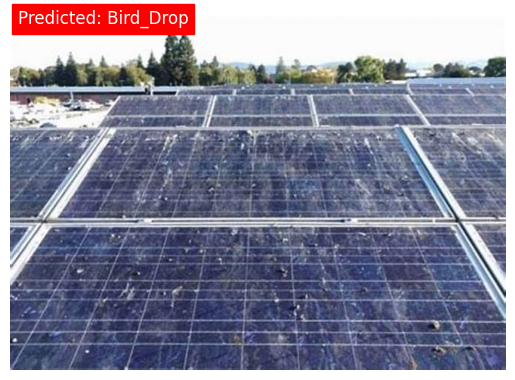

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

inception v3

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import inception_v3, Inception_V3_Weights
import os

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Data directory
data_dir = 'images/dataset'

# Data transforms (Inception v3 uses 299x299 input size)
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(320),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

# Load datasets
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}

dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=2)
    for x in ['train', 'val']
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
num_classes = len(class_names)

# Load pretrained Inception v3
weights = Inception_V3_Weights.DEFAULT
model = inception_v3(weights=weights)

# Replace the final fully connected layers
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, num_classes)

# Move to GPU
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 133MB/s]


In [ ]:
num_epochs = 15

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    for phase in ['train', 'val']:
        model.train() if phase == 'train' else model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                if phase == 'train':
                    outputs, aux_outputs = model(inputs)
                    loss1 = criterion(outputs, labels)
                    loss2 = criterion(aux_outputs, labels)
                    loss = loss1 + 0.4 * loss2  # weighted sum
                else:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

# Save the model
torch.save(model.state_dict(), 'solar_inceptionv3_classification_model.pth')


Epoch 1/15
train Loss: 2.0204 Acc: 0.4197
val Loss: 0.8273 Acc: 0.7877

Epoch 2/15
train Loss: 1.4429 Acc: 0.6115
val Loss: 0.5193 Acc: 0.8630

Epoch 3/15
train Loss: 1.3934 Acc: 0.6426
val Loss: 0.4949 Acc: 0.8151

Epoch 4/15
train Loss: 1.2821 Acc: 0.6852
val Loss: 0.5156 Acc: 0.8288

Epoch 5/15
train Loss: 1.1969 Acc: 0.6951
val Loss: 0.3721 Acc: 0.8836

Epoch 6/15
train Loss: 1.0910 Acc: 0.7377
val Loss: 0.4340 Acc: 0.8836

Epoch 7/15
train Loss: 1.0733 Acc: 0.7279
val Loss: 0.4807 Acc: 0.8699

Epoch 8/15
train Loss: 1.0942 Acc: 0.7131
val Loss: 0.5838 Acc: 0.8493

Epoch 9/15
train Loss: 1.0371 Acc: 0.7475
val Loss: 0.3468 Acc: 0.8699

Epoch 10/15
train Loss: 0.9954 Acc: 0.7492
val Loss: 0.3311 Acc: 0.8630

Epoch 11/15
train Loss: 0.9315 Acc: 0.7590
val Loss: 0.2784 Acc: 0.9178

Epoch 12/15
train Loss: 0.8881 Acc: 0.7770
val Loss: 0.2910 Acc: 0.9110

Epoch 13/15
train Loss: 0.9113 Acc: 0.7869
val Loss: 0.2960 Acc: 0.9041

Epoch 14/15
train Loss: 0.9086 Acc: 0.7902
val Loss: 0.2736

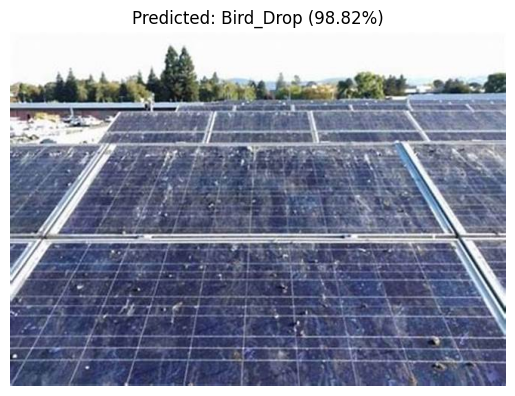

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import inception_v3, Inception_V3_Weights
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# 1. Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load InceptionV3 with correct aux_logits and modify for 6 classes
weights = Inception_V3_Weights.DEFAULT
model = inception_v3(weights=weights, aux_logits=True)  # Must be True for loading state_dict

# Modify main classifier
model.fc = nn.Linear(model.fc.in_features, 6)

# Modify auxiliary classifier
model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, 6)

# 3. Load trained weights
model.load_state_dict(torch.load('solar_inceptionv3_classification_model.pth'))
model = model.to(device)
model.eval()

# 4. Define class labels
class_names = ['Bird_Drop', 'Clean', 'Dusty', 'Electrical_Damage', 'Physical_Damage', 'Snow_Covered']

# 5. Define preprocessing (Inception expects 299x299)
transform = transforms.Compose([
    transforms.Resize(320),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    weights.transforms()  # This adds normalization for ImageNet
])

# 6. Load one test image
test_dir = '/content/images/test'
class_folder = os.listdir(test_dir)[5]  # Pick any class folder
class_path = os.path.join(test_dir, class_folder)
image_file = os.listdir(class_path)[2]  # Pick any image
image_path = os.path.join(class_path, image_file)

# 7. Load and preprocess the image
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0).to(device)  # Add batch dim and move to device

# 8. Inference
with torch.no_grad():
    output = model(input_batch)
    _, pred_class = output.max(1)
    prob = torch.nn.functional.softmax(output[0], dim=0)[pred_class.item()]
    predicted_class_name = class_names[pred_class.item()]

# 9. Visualize the result
plt.imshow(np.array(image))
plt.axis('off')
plt.title(f"Predicted: {predicted_class_name} ({prob*100:.2f}%)", fontsize=12)
plt.show()


 EfficientNet-B0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import os

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Set dataset directory
data_dir = 'images/dataset'

# Set data transforms (input size 224 for B0)
weights = EfficientNet_B0_Weights.DEFAULT
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        weights.transforms()
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        weights.transforms()
    ]),
}

# Load dataset
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}

dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=2)
    for x in ['train', 'val']
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
num_classes = len(class_names)

# Load pre-trained EfficientNet-B0
model = efficientnet_b0(weights=weights)

# Replace the classifier (final layer)
in_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(in_features, num_classes)

model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 167MB/s]


In [ ]:
num_epochs = 19

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    for phase in ['train', 'val']:
        model.train() if phase == 'train' else model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("✅ Training complete!")

# Save the model
torch.save(model.state_dict(), 'solar_efficientnet_b0_model.pth')



Epoch 1/19
train Loss: 1.5345 Acc: 0.4115
val Loss: 1.1839 Acc: 0.6233

Epoch 2/19
train Loss: 1.1492 Acc: 0.5738
val Loss: 0.7513 Acc: 0.8014

Epoch 3/19
train Loss: 0.9981 Acc: 0.6443
val Loss: 0.6656 Acc: 0.7945

Epoch 4/19
train Loss: 0.8898 Acc: 0.6951
val Loss: 0.6215 Acc: 0.7808

Epoch 5/19
train Loss: 0.8729 Acc: 0.6754
val Loss: 0.5407 Acc: 0.8082

Epoch 6/19
train Loss: 0.7859 Acc: 0.7246
val Loss: 0.4880 Acc: 0.8699

Epoch 7/19
train Loss: 0.7959 Acc: 0.7279
val Loss: 0.4948 Acc: 0.8219

Epoch 8/19
train Loss: 0.6806 Acc: 0.7557
val Loss: 0.4062 Acc: 0.8767

Epoch 9/19
train Loss: 0.7275 Acc: 0.7377
val Loss: 0.3966 Acc: 0.8836

Epoch 10/19
train Loss: 0.6306 Acc: 0.7967
val Loss: 0.3910 Acc: 0.8630

Epoch 11/19
train Loss: 0.5512 Acc: 0.8148
val Loss: 0.4062 Acc: 0.8904

Epoch 12/19
train Loss: 0.5724 Acc: 0.8115
val Loss: 0.3539 Acc: 0.8904

Epoch 13/19
train Loss: 0.5402 Acc: 0.8033
val Loss: 0.3401 Acc: 0.8904

Epoch 14/19
train Loss: 0.5904 Acc: 0.7803
val Loss: 0.3451

In [ ]:
num_epochs = 30

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    for phase in ['train', 'val']:
        model.train() if phase == 'train' else model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("✅ Training complete!")

# Save the model
torch.save(model.state_dict(), 'solar_efficientnet_b0_model.pth')


Epoch 1/30
train Loss: 1.4883 Acc: 0.4098
val Loss: 1.0527 Acc: 0.7260

Epoch 2/30
train Loss: 1.1578 Acc: 0.5951
val Loss: 0.7542 Acc: 0.7945

Epoch 3/30
train Loss: 0.9933 Acc: 0.6426
val Loss: 0.6290 Acc: 0.8493

Epoch 4/30
train Loss: 0.9319 Acc: 0.6787
val Loss: 0.5616 Acc: 0.8562

Epoch 5/30
train Loss: 0.7937 Acc: 0.7443
val Loss: 0.4750 Acc: 0.8699

Epoch 6/30
train Loss: 0.8317 Acc: 0.7197
val Loss: 0.4671 Acc: 0.8630

Epoch 7/30
train Loss: 0.7571 Acc: 0.7311
val Loss: 0.5305 Acc: 0.8288

Epoch 8/30
train Loss: 0.7206 Acc: 0.7623
val Loss: 0.4997 Acc: 0.8356

Epoch 9/30
train Loss: 0.6426 Acc: 0.7590
val Loss: 0.5023 Acc: 0.8425

Epoch 10/30
train Loss: 0.6555 Acc: 0.7770
val Loss: 0.3912 Acc: 0.8836

Epoch 11/30
train Loss: 0.5583 Acc: 0.8115
val Loss: 0.5020 Acc: 0.8562

Epoch 12/30
train Loss: 0.5773 Acc: 0.8000
val Loss: 0.4526 Acc: 0.8425

Epoch 13/30
train Loss: 0.5964 Acc: 0.7885
val Loss: 0.2864 Acc: 0.9041

Epoch 14/30
train Loss: 0.4925 Acc: 0.8393
val Loss: 0.3709

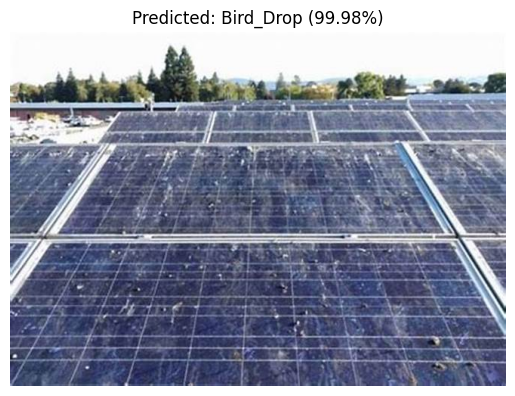

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# 1. Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load the trained EfficientNet-B0 model
weights = EfficientNet_B0_Weights.DEFAULT
model = efficientnet_b0(weights=weights)

# Modify the classifier to match your trained model (6 classes)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 6)

# Load trained weights
model.load_state_dict(torch.load('solar_efficientnet_b0_model.pth'))
model = model.to(device)
model.eval()

# 3. Define your class labels
class_names = ['Bird_Drop', 'Clean', 'Dusty', 'Electrical_Damage', 'Physical_Damage', 'Snow_Covered']

# 4. Define the transform (should match validation/test transform)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    weights.transforms()
])

# 5. Load one test image
test_dir = '/content/images/test'
class_folder = os.listdir(test_dir)[5]  # randomly pick a class folder
class_path = os.path.join(test_dir, class_folder)
image_file = os.listdir(class_path)[2]  # pick an image from that folder
image_path = os.path.join(class_path, image_file)

# 6. Open and preprocess the image
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0).to(device)

# 7. Run inference
with torch.no_grad():
    output = model(input_batch)
    _, pred_class = output.max(1)
    prob = torch.nn.functional.softmax(output[0], dim=0)[pred_class.item()]
    predicted_class_name = class_names[pred_class.item()]

# 8. Display the result
plt.imshow(np.array(image))
plt.axis('off')
plt.title(f"Predicted: {predicted_class_name} ({prob*100:.2f}%)", fontsize=12, color='black')
plt.show()


Resnet18-Good

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms

# 1. Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Define class labels (must match folder names)
class_names = ['Bird_Drop', 'Clean', 'Dusty', 'Electrical_Damage', 'Physical_Damage', 'Snow_Covered']
num_classes = len(class_names)

# 3. Paths
data_dir = '/content/images/dataset'  # Structure: /train/class_x/abc.jpg, /val/class_y/xyz.jpg
model_path = 'solar_resnet18_model.pth'

# 4. Data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

# 5. Load datasets
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=2)
    for x in ['train', 'val']
}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(f"Train size: {dataset_sizes['train']} | Val size: {dataset_sizes['val']}")

# 6. Load and modify ResNet18
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# 7. Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 8. Training loop
num_epochs = 20
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    for phase in ['train', 'val']:
        model.train() if phase == 'train' else model.eval()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        print(f"{phase.capitalize()} Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}")

print("\n✅ Training complete!")

# 9. Save the trained model
torch.save(model.state_dict(), model_path)
print(f"✅ Model saved to: {model_path}")


Train size: 610 | Val size: 146


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]



Epoch 1/20
Train Loss: 1.4589 | Acc: 0.4541
Val Loss: 0.6959 | Acc: 0.7945

Epoch 2/20
Train Loss: 0.7984 | Acc: 0.7344
Val Loss: 0.4836 | Acc: 0.8219

Epoch 3/20
Train Loss: 0.6154 | Acc: 0.7902
Val Loss: 0.5021 | Acc: 0.8082

Epoch 4/20
Train Loss: 0.5433 | Acc: 0.8246
Val Loss: 0.2772 | Acc: 0.8973

Epoch 5/20
Train Loss: 0.4786 | Acc: 0.8443
Val Loss: 0.3306 | Acc: 0.8836

Epoch 6/20
Train Loss: 0.4405 | Acc: 0.8393
Val Loss: 0.2699 | Acc: 0.9110

Epoch 7/20
Train Loss: 0.3691 | Acc: 0.8721
Val Loss: 0.3332 | Acc: 0.8904

Epoch 8/20
Train Loss: 0.3573 | Acc: 0.8885
Val Loss: 0.2409 | Acc: 0.9315

Epoch 9/20
Train Loss: 0.3383 | Acc: 0.8803
Val Loss: 0.2806 | Acc: 0.9247

Epoch 10/20
Train Loss: 0.2681 | Acc: 0.9230
Val Loss: 0.2128 | Acc: 0.9315

Epoch 11/20
Train Loss: 0.2881 | Acc: 0.9033
Val Loss: 0.2360 | Acc: 0.9384

Epoch 12/20
Train Loss: 0.2189 | Acc: 0.9246
Val Loss: 0.2505 | Acc: 0.9315

Epoch 13/20
Train Loss: 0.2422 | Acc: 0.9262
Val Loss: 0.2283 | Acc: 0.9247

Epoch 1

In [ ]:
# --- Define test path ---
test_dir = '/content/images/test'

# --- Load test dataset ---
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])  # Use validation transforms
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)

# --- Get dataset size and classes ---
test_size = len(test_dataset)
print(f"📦 Test dataset size: {test_size}")


📦 Test dataset size: 128


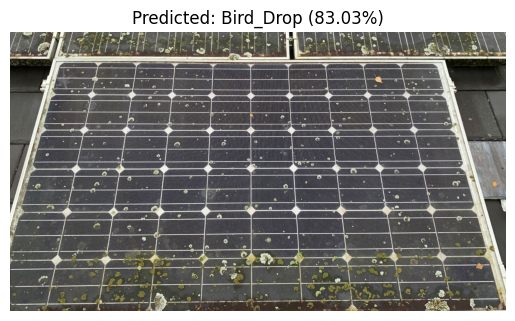

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# 1. Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load the trained ResNet18 model
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)

# Modify the final fully connected layer for 6 classes
model.fc = nn.Linear(model.fc.in_features, 6)

# Load trained weights
model.load_state_dict(torch.load('solar_resnet18_model.pth', map_location=device))
model = model.to(device)
model.eval()

# 3. Define your class labels
class_names = ['Bird_Drop', 'Clean', 'Dusty', 'Electrical_Damage', 'Physical_Damage', 'Snow_Covered']

# 4. Define the transform (ResNet expects 224x224)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    weights.transforms()  # Includes normalization for ImageNet
])

# 5. Load one test image
test_dir = '/content/images/test'
class_folder = os.listdir(test_dir)[5]  # randomly pick a class folder
class_path = os.path.join(test_dir, class_folder)
image_file = os.listdir(class_path)[2]  # pick an image from that folder
image_path = os.path.join(class_path, image_file)

# 6. Open and preprocess the image
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0).to(device)

# 7. Run inference
with torch.no_grad():
    output = model(input_batch)
    _, pred_class = output.max(1)
    prob = torch.nn.functional.softmax(output[0], dim=0)[pred_class.item()]
    predicted_class_name = class_names[pred_class.item()]

# 8. Display the result
plt.imshow(np.array(image))
plt.axis('off')
plt.title(f"Predicted: {predicted_class_name} ({prob*100:.2f}%)", fontsize=12, color='black')
plt.show()


streamlit

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [1]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [3]:
%%writefile app.py
import streamlit as st
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image, UnidentifiedImageError
import numpy as np


# --- Page Configuration ---
st.set_page_config(
    page_title="Solar Panel Classifier",
    page_icon="✈️",
    layout="wide",
    initial_sidebar_state="expanded"
)

page = st.sidebar.radio(
    "Select Dataset",
    ["🏠 Home", "🌍 EDA", "🗓️ Predictor","📦 Object Detection","🧾Detailed Report"]
)

if page == "🏠 Home":
    st.title("🔍 Solar Panel Image Classifier")
    st.markdown("This application helps analyse and classify solar panel conditions from images")
    st.markdown("---")

    col1, col2 = st.columns(2)
    with col1:
        st.subheader("📊 Explore Dataset")
        st.markdown("View class distribution, sample images, and image properties.")

    with col2:
        st.subheader("🧠 Predict Conditions")
        st.markdown("Upload a panel image to detect condition using a trained ResNet18 model.")

    st.markdown("---")
    st.subheader("📌 Navigation Guide")
    st.markdown("""
    - Go to **🌍 EDA** to explore your dataset.
    - Go to **🗓️ Predictor** to upload and classify images.
    - Go to **🧾 Detailed Report** for model evaluation and metrics (coming soon).
    """)


elif page == "🌍 EDA":
    st.title("📊 Dataset Explorer")
    split = st.sidebar.radio("Choose dataset split", ["Training", "Validation"])
# Paths
    train_dir = r"C:\Users\Sathish\Desktop\project_5\dataset\train"
    val_dir = r"C:\Users\Sathish\Desktop\project_5\dataset\val"
    test_dir = r"C:\Users\Sathish\Desktop\project_5\test"
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')


    def plot_class_distribution(image_dir, title):
        st.subheader(f"📊Class Distribution - {title}")
        classes = os.listdir(image_dir)
        class_counts = {
            cls: len([
               f for f in os.listdir(os.path.join(image_dir, cls))
               if f.lower().endswith(valid_extensions)
            ])
            for cls in classes
        }

        fig, ax = plt.subplots()
        sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), ax=ax)
        ax.set_title("Class Distribution")
        ax.set_xlabel("Class")
        ax.set_ylabel("Number of Images")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        st.pyplot(fig)

        return classes


    def show_images_per_class(image_dir, classes, n=3):
        st.subheader("📷Sample Images Per Class")
        for cls in classes:
           st.markdown(f"**{cls}**")
           class_path = os.path.join(image_dir, cls)
           images = [
                img for img in os.listdir(class_path)
                if img.lower().endswith(valid_extensions)
            ][:n]
           cols = st.columns(n)
           for i, img_name in enumerate(images):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = Image.open(img_path)
                    cols[i].image(img, use_container_width=True)
                except UnidentifiedImageError:
                    st.warning(f"Unreadable image skipped: {img_name}")


    def image_stats(image_dir, classes):
        st.subheader("📐 Image Size and Channel Info")
        widths, heights, channels = [], [], []
        for cls in classes:
            for img_name in os.listdir(os.path.join(image_dir, cls))[:20]:
                if not img_name.lower().endswith(valid_extensions):
                    continue
                img_path = os.path.join(image_dir, cls, img_name)
                try:
                   img = Image.open(img_path)
                   w, h = img.size
                   widths.append(w)
                   heights.append(h)
                   channels.append(len(img.getbands()))
                except:
                   continue

        st.write(f"**Average Width**: {np.mean(widths):.2f}")
        st.write(f"**Average Height**: {np.mean(heights):.2f}")
        st.write(f"**Image Modes (Number of Channels)**: {set(channels)}")


    def rgb_mean_std(image_dir, classes):
        st.subheader("🎨 RGB Mean and Standard Deviation")
        r_vals, g_vals, b_vals = [], [], []
        for cls in classes:
            folder_path = os.path.join(image_dir, cls)
            for img_name in os.listdir(folder_path)[:20]:
                if not img_name.lower().endswith(valid_extensions):
                    continue
                img_path = os.path.join(folder_path, img_name)
                try:
                    img = Image.open(img_path).resize((100, 100)).convert('RGB')
                    arr = np.array(img) / 255.0
                    r_vals.append(np.mean(arr[:, :, 0]))
                    g_vals.append(np.mean(arr[:, :, 1]))
                    b_vals.append(np.mean(arr[:, :, 2]))
                except UnidentifiedImageError:
                    continue

        st.write(f"**Mean R**: {np.mean(r_vals):.4f}, **G**: {np.mean(g_vals):.4f}, **B**: {np.mean(b_vals):.4f}")
        st.write(f"**Std R**: {np.std(r_vals):.4f}, **G**: {np.std(g_vals):.4f}, **B**: {np.std(b_vals):.4f}")


# --- Streamlit App Flow ---
    if split == "Training":
       st.header("Training Set")
       train_classes = plot_class_distribution(train_dir, "Training")
       show_images_per_class(train_dir, train_classes)
       image_stats(train_dir, train_classes)
       rgb_mean_std(train_dir, train_classes)

    elif split == "Validation":
       st.header("Validation Set")
       val_classes = plot_class_distribution(val_dir, "Validation")
       show_images_per_class(val_dir, val_classes)
       image_stats(val_dir, val_classes)
       rgb_mean_std(val_dir, val_classes)




elif page == "🗓️ Predictor":
    st.title("🧪 Image Prediction")
    st.markdown("Upload a solar panel image to classify its condition.")
    st.write("Upload an image of a solar panel to detect its condition:")
# --- Class names (must match training) ---
    class_names = ['Bird_Drop', 'Clean', 'Dusty', 'Electrical_Damage', 'Physical_Damage', 'Snow_Covered']

# --- Load trained model ---
    @st.cache_resource
    def load_model():
       weights = ResNet18_Weights.DEFAULT
       model = resnet18(weights=weights)
       model.fc = nn.Linear(model.fc.in_features, len(class_names))  # 6 classes
       model.load_state_dict(torch.load("solar_resnet18_model.pth", map_location=torch.device("cpu")))
       model.eval()
       return model
    model = load_model()

# --- Define transforms (must match training/validation) ---
    weights = ResNet18_Weights.DEFAULT
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        weights.transforms()
    ])

# --- Upload image ---
    uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
    # Open and display image
        image = Image.open(uploaded_file).convert("RGB")

    # Preprocess
        input_tensor = transform(image).unsqueeze(0)

    # Inference
        with torch.no_grad():
           output = model(input_tensor)
           _, pred_class = output.max(1)
           prob = torch.nn.functional.softmax(output[0], dim=0)[pred_class.item()]
           predicted_class_name = class_names[pred_class.item()]

    # Display prediction info
        st.markdown(f"### 🧠 Predicted Class: `{predicted_class_name}`")
        st.markdown(f"### 🔢 Confidence: `{prob:.2%}`")
    # Display annotated image with label
        img_np = np.array(image)
        fig, ax = plt.subplots()
        ax.imshow(img_np)
        ax.axis('off')
        ax.text(10, 25, f'{predicted_class_name}', fontsize=14, color='white', backgroundcolor='red')
        st.pyplot(fig)


elif page == "📦 Object Detection":
    st.title("📦 Object Detection - YOLOv8s")
    st.markdown("Upload an image to detect solar panel conditions using YOLOv8s model.")

    # Confidence threshold slider
    conf_threshold = st.slider("Confidence Threshold", min_value=0.01, max_value=0.5, value=0.05, step=0.01)

    uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"], key="object_detect")

    if uploaded_file is not None:
        from ultralytics import YOLO
        import tempfile
        import numpy as np

        # Load image
        image = Image.open(uploaded_file).convert("RGB")
        st.image(image, caption="Uploaded Image", use_container_width=True)

        # Save temporarily
        with tempfile.NamedTemporaryFile(delete=False, suffix=".jpg") as tmp_file:
            image.save(tmp_file.name)
            tmp_path = tmp_file.name

        # Load model
        model = YOLO("/content/drive/MyDrive/best.pt")

        # Run detection
        results = model.predict(source=tmp_path, conf=conf_threshold)

        # Display detection image
        result_img = results[0].plot()
        st.image(result_img, caption="YOLOv8s Detection", use_container_width=True)

        # Display detections
        st.subheader("📋 Detected Classes")
        if results[0].boxes:
            for box in results[0].boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                class_name = model.names[cls_id]
                st.markdown(f"✅ **{class_name}** with confidence **{conf:.2%}**")
        else:
            st.warning("❌ No detections made at this confidence threshold.")




Overwriting app.py


In [4]:
!pip install pyngrok

In [5]:
!npm install localtunnel

⠙⠹⠸⠼⠴
up to date, audited 23 packages in 893ms
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠴

In [6]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.227.144.3
⠙⠹your url is: https://old-regions-argue.loca.lt
/content/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:30941 (check your firewall settings)
    at Socket.<anonymous> (/content/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙

In [ ]:
import os

def find_best_pt(path="/content/drive/MyDrive"):
    for root, dirs, files in os.walk(path):
        if "best.pt" in files:
            print("Found:", os.path.join(root, "best.pt"))

find_best_pt()


Found: /content/drive/MyDrive/best.pt


yolo v8


In [ ]:
!unzip /content/drive/MyDrive/solar_image.v1-roboflow-instant-1--eval-.yolov8.zip -d yolo_roboflow/

Archive:  /content/drive/MyDrive/solar_image.v1-roboflow-instant-1--eval-.yolov8.zip
  inflating: yolo_roboflow/README.roboflow.txt  
  inflating: yolo_roboflow/data.yaml  
   creating: yolo_roboflow/test/
   creating: yolo_roboflow/test/images/
 extracting: yolo_roboflow/test/images/Bird-177-_jpg.rf.533a5d7998a61f43607510f0651c39db.jpg  
 extracting: yolo_roboflow/test/images/Bird-188-_jpg.rf.5da804d08bbcd724beb1da2d401e89cf.jpg  
 extracting: yolo_roboflow/test/images/Bird-189-_jpg.rf.da0ee0d2b313ae4970f13741ab03a7ea.jpg  
 extracting: yolo_roboflow/test/images/Clean-167-_jpg.rf.93b7f135f0bb38aceb6945b02505ec70.jpg  
 extracting: yolo_roboflow/test/images/Dust-166-_jpg.rf.76b29be5e8b0967be5026d22a906c900.jpg  
 extracting: yolo_roboflow/test/images/Electrical-33-_jpg.rf.18768d73440b1c8e5633b892fc4852db.jpg  
 extracting: yolo_roboflow/test/images/Physical-46-_jpg.rf.10fdce03b7d50cb0e98f035f35cdc569.jpg  
 extracting: yolo_roboflow/test/images/Snow-109-_jpg.rf.106987070d13f8a620cbf42a

In [ ]:
import os

#os.rename('/content/yolo/yolov8/custom_data.yaml.txt', '/content/yolo/yolov8/custom_data.yaml')


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import torch
print(torch.cuda.is_available())   # Should return True


True


In [ ]:
model.train(
    data="/content/yolo_roboflow/data.yaml",  # ✅ Use the full path to the .yaml file
    epochs=50,
    imgsz=640,
    batch=4,
    name="solar_panel_yolov8m",
    verbose=True
)


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_roboflow/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=solar_panel_yolov8m, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3779749  ultralytics.nn.modules.head.Detect           [7, [192, 384, 576]]          
Model summary: 169 layers, 25,860,373 parameters, 25,860,357 gradients, 79.1 GFLOPs

Tra

100%|██████████| 5.35M/5.35M [00:00<00:00, 77.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 34.3±28.6 MB/s, size: 77.1 KB)


train: Scanning /content/yolo_roboflow/train/labels... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 605.33it/s]

train: New cache created: /content/yolo_roboflow/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 37.9±41.7 MB/s, size: 400.0 KB)


val: Scanning /content/yolo_roboflow/valid/labels... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 305.51it/s]

val: New cache created: /content/yolo_roboflow/valid/labels.cache


Plotting labels to runs/detect/solar_panel_yolov8m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/solar_panel_yolov8m
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.98G      2.817      6.147      2.943          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all         23         23    0.00342      0.131     0.0089    0.00114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.39G      2.678      5.091      2.763         11        640: 100%|██████████| 20/20 [00:03<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.04it/s]

                   all         23         23    0.00125       0.25      0.008     0.0015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.46G      2.432      4.648      2.572          7        640: 100%|██████████| 20/20 [00:03<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         23         23      0.194      0.119     0.0278      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.53G      2.474      4.443      2.525          9        640: 100%|██████████| 20/20 [00:04<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         23         23      0.147     0.0476    0.00547    0.00131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.7G      2.348      4.285      2.404          6        640: 100%|██████████| 20/20 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         23         23       0.31     0.0238    0.00619   0.000947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.77G      2.392      4.258      2.476          7        640: 100%|██████████| 20/20 [00:04<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]

                   all         23         23       0.43     0.0238   0.000795   0.000259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.86G      2.401      4.332      2.462          9        640: 100%|██████████| 20/20 [00:03<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]

                   all         23         23   0.000778      0.274    0.00132    0.00053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.03G      2.419      4.226      2.462          9        640: 100%|██████████| 20/20 [00:03<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]

                   all         23         23   0.000843      0.214    0.00204   0.000641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       3.3G      2.459       4.23      2.528          8        640: 100%|██████████| 20/20 [00:03<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.32it/s]

                   all         23         23    0.00114      0.381     0.0016   0.000526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.37G      2.298      4.134      2.401          9        640: 100%|██████████| 20/20 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.72it/s]

                   all         23         23   0.000808      0.214   0.000856   0.000409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.45G      2.249      4.049      2.355          6        640: 100%|██████████| 20/20 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]

                   all         23         23    0.00167      0.262    0.00286   0.000846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.61G      2.368      4.012      2.452          6        640: 100%|██████████| 20/20 [00:03<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]

                   all         23         23      0.002      0.274    0.00412     0.0015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.76G      2.248      4.086      2.396          6        640: 100%|██████████| 20/20 [00:03<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.82it/s]

                   all         23         23    0.00214      0.452     0.0081    0.00243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.91G      2.197      3.974      2.347         11        640: 100%|██████████| 20/20 [00:03<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.96it/s]

                   all         23         23    0.00127      0.143    0.00326    0.00151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.06G      2.318      3.928      2.424          8        640: 100%|██████████| 20/20 [00:03<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]

                   all         23         23   0.000872       0.19    0.00169   0.000608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.21G      2.241      4.108      2.371          9        640: 100%|██████████| 20/20 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.85it/s]

                   all         23         23    0.00123      0.405    0.00255   0.000816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.37G      2.251       3.85      2.397          7        640: 100%|██████████| 20/20 [00:03<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all         23         23      0.002      0.583     0.0114    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.53G      2.237       3.84      2.356          8        640: 100%|██████████| 20/20 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]

                   all         23         23    0.00251      0.536    0.00971    0.00299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.69G      2.205      3.911      2.373          8        640: 100%|██████████| 20/20 [00:03<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]

                   all         23         23      0.435     0.0476     0.0192    0.00441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.86G      2.328      3.714      2.445          9        640: 100%|██████████| 20/20 [00:03<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]

                   all         23         23      0.579     0.0476      0.013    0.00346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.95G      2.193      3.778      2.349         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]

                   all         23         23      0.736     0.0476      0.123     0.0247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.12G        2.2      3.808      2.318          9        640: 100%|██████████| 20/20 [00:03<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]

                   all         23         23    0.00215      0.536    0.00731    0.00242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       5.3G      2.202      3.743      2.314          5        640: 100%|██████████| 20/20 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.09it/s]

                   all         23         23    0.00241      0.583    0.00648     0.0022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       5.4G      2.159      3.646      2.265          8        640: 100%|██████████| 20/20 [00:03<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.35it/s]

                   all         23         23      0.573     0.0476     0.0081    0.00262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.54G       2.22      3.578       2.29          5        640: 100%|██████████| 20/20 [00:03<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]

                   all         23         23      0.573     0.0476     0.0125    0.00377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.71G      2.165      3.601       2.29         12        640: 100%|██████████| 20/20 [00:03<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.23it/s]

                   all         23         23    0.00249      0.643     0.0138    0.00361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.88G      2.046      3.562      2.235          7        640: 100%|██████████| 20/20 [00:03<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.62it/s]

                   all         23         23      0.599     0.0238     0.0187    0.00485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.02G       1.97      3.646      2.257         11        640: 100%|██████████| 20/20 [00:03<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.76it/s]

                   all         23         23      0.749     0.0238     0.0206    0.00605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.16G      2.048      3.448      2.262          9        640: 100%|██████████| 20/20 [00:03<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]

                   all         23         23     0.0052      0.369      0.025    0.00778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       6.3G      2.066      3.539      2.338          6        640: 100%|██████████| 20/20 [00:03<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]

                   all         23         23    0.00629      0.131     0.0211    0.00564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.47G      2.121      3.473      2.329         14        640: 100%|██████████| 20/20 [00:03<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.45it/s]

                   all         23         23      0.167      0.168     0.0207    0.00584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.61G      1.979      3.509      2.273          7        640: 100%|██████████| 20/20 [00:03<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]

                   all         23         23    0.00435      0.583     0.0628      0.017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.75G      2.052      3.336      2.313         13        640: 100%|██████████| 20/20 [00:04<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.33it/s]

                   all         23         23    0.00351      0.619     0.0231    0.00776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.91G      1.943      3.319      2.261         12        640: 100%|██████████| 20/20 [00:03<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.48it/s]

                   all         23         23      0.439     0.0238     0.0314     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.05G      2.098        3.4      2.346          9        640: 100%|██████████| 20/20 [00:03<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.87it/s]

                   all         23         23      0.435     0.0476     0.0334     0.0104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.32G       1.94      3.304      2.258          9        640: 100%|██████████| 20/20 [00:03<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         23         23      0.313      0.155     0.0573     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.38G      1.937        3.3       2.23         15        640: 100%|██████████| 20/20 [00:03<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.95it/s]

                   all         23         23      0.339      0.131     0.0576     0.0198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.15G      1.986      3.288      2.303          8        640: 100%|██████████| 20/20 [00:03<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.37it/s]

                   all         23         23      0.309     0.0714     0.0938     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.15G      2.006      3.401      2.326          8        640: 100%|██████████| 20/20 [00:03<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]

                   all         23         23      0.334     0.0952     0.0973     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.15G      2.016      3.219       2.32         10        640: 100%|██████████| 20/20 [00:03<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.00it/s]

                   all         23         23      0.336      0.131      0.104     0.0408


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.15G          2      3.477      2.374          4        640: 100%|██████████| 20/20 [00:03<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]

                   all         23         23      0.391     0.0952      0.106     0.0411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.15G      1.956      3.448      2.363          4        640: 100%|██████████| 20/20 [00:03<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]

                   all         23         23      0.306       0.19     0.0556     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       3.2G      1.891      3.269      2.277          4        640: 100%|██████████| 20/20 [00:03<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]

                   all         23         23      0.314      0.143     0.0545     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.26G      1.929      3.213      2.298          4        640: 100%|██████████| 20/20 [00:03<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.93it/s]

                   all         23         23      0.159       0.19     0.0467     0.0146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.33G      1.912      3.274      2.334          4        640: 100%|██████████| 20/20 [00:03<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.89it/s]

                   all         23         23     0.0311      0.286     0.0482      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.39G      1.936      3.119      2.336          4        640: 100%|██████████| 20/20 [00:03<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.24it/s]

                   all         23         23      0.313      0.119     0.0448     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.46G      1.839      3.122      2.282          4        640: 100%|██████████| 20/20 [00:03<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]

                   all         23         23      0.302      0.119     0.0384      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.57G      1.754      3.067      2.179          4        640: 100%|██████████| 20/20 [00:03<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]

                   all         23         23      0.311      0.119     0.0378     0.0115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.74G      1.814      3.047      2.222          4        640: 100%|██████████| 20/20 [00:03<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.24it/s]

                   all         23         23      0.438     0.0952     0.0312     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.87G      1.843      3.019      2.251          4        640: 100%|██████████| 20/20 [00:03<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.33it/s]

                   all         23         23       0.44     0.0952     0.0373     0.0117



50 epochs completed in 0.066 hours.
Optimizer stripped from runs/detect/solar_panel_yolov8m/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/solar_panel_yolov8m/weights/best.pt, 52.0MB

Validating runs/detect/solar_panel_yolov8m/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]


                   all         23         23      0.392     0.0952      0.106      0.041
             Bird_Drop          4          4          1          0     0.0154    0.00512
                 Clean          3          3          1          0     0.0553     0.0128
                  Dust          3          3          0          0     0.0765     0.0322
     Electrical_Damage          6          6      0.058      0.167     0.0823     0.0294
       Physical_Damage          2          2      0.684        0.5      0.495      0.202
                  Snow          4          4          0          0     0.0155    0.00586
               objects          1          1          0          0          0          0
Speed: 0.3ms preprocess, 14.5ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/detect/solar_panel_yolov8m


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8b3d77ecd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [ ]:
import os

# Check what folders are in the runs/detect directory
print(os.listdir("runs/detect"))

# Check if weights folder exists inside your experiment
print(os.listdir("runs/detect/solar_panel_yolov8m"))

# Check if best.pt or last.pt is present
print(os.listdir("runs/detect/solar_panel_yolov8m/weights"))


['solar_panel_yolov8m']
['val_batch1_labels.jpg', 'BoxPR_curve.png', 'labels.jpg', 'val_batch2_pred.jpg', 'confusion_matrix_normalized.png', 'val_batch0_labels.jpg', 'weights', 'args.yaml', 'results.png', 'BoxR_curve.png', 'results.csv', 'train_batch0.jpg', 'confusion_matrix.png', 'BoxF1_curve.png', 'BoxP_curve.png', 'labels_correlogram.jpg', 'train_batch801.jpg', 'train_batch2.jpg', 'train_batch800.jpg', 'val_batch2_labels.jpg', 'val_batch0_pred.jpg', 'val_batch1_pred.jpg', 'train_batch1.jpg', 'train_batch802.jpg']
['best.pt', 'last.pt']


In [ ]:
# Check if best.pt or last.pt is present
print(os.listdir("runs/detect/solar_panel_yolov8m/weights"))

['best.pt', 'last.pt']


In [ ]:
from ultralytics import YOLO

# Load trained YOLOv8 model
model = YOLO("runs/detect/solar_panel_yolov8m/weights/best.pt")

# ----------------------------------
# 🔍 Inference on one image
# ----------------------------------
image_path = "/content/yolo_roboflow/test/images/Bird-177-_jpg.rf.533a5d7998a61f43607510f0651c39db.jpg"  # 👈 replace this
results = model(image_path, save=True, conf=0.25)
print("Inference on single image complete. Output saved to 'runs/detect/predict/'")

# ----------------------------------
# 📁 Inference on folder of images
# ----------------------------------
#folder_path = "/content/yolo_roboflow/test/images"
#results = model(folder_path, save=True, conf=0.1)
#print("Inference on image folder complete. Output saved to 'runs/detect/predict/'")




image 1/1 /content/yolo_roboflow/test/images/Bird-177-_jpg.rf.533a5d7998a61f43607510f0651c39db.jpg: 384x640 (no detections), 26.0ms
Speed: 2.3ms preprocess, 26.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
Inference on single image complete. Output saved to 'runs/detect/predict/'


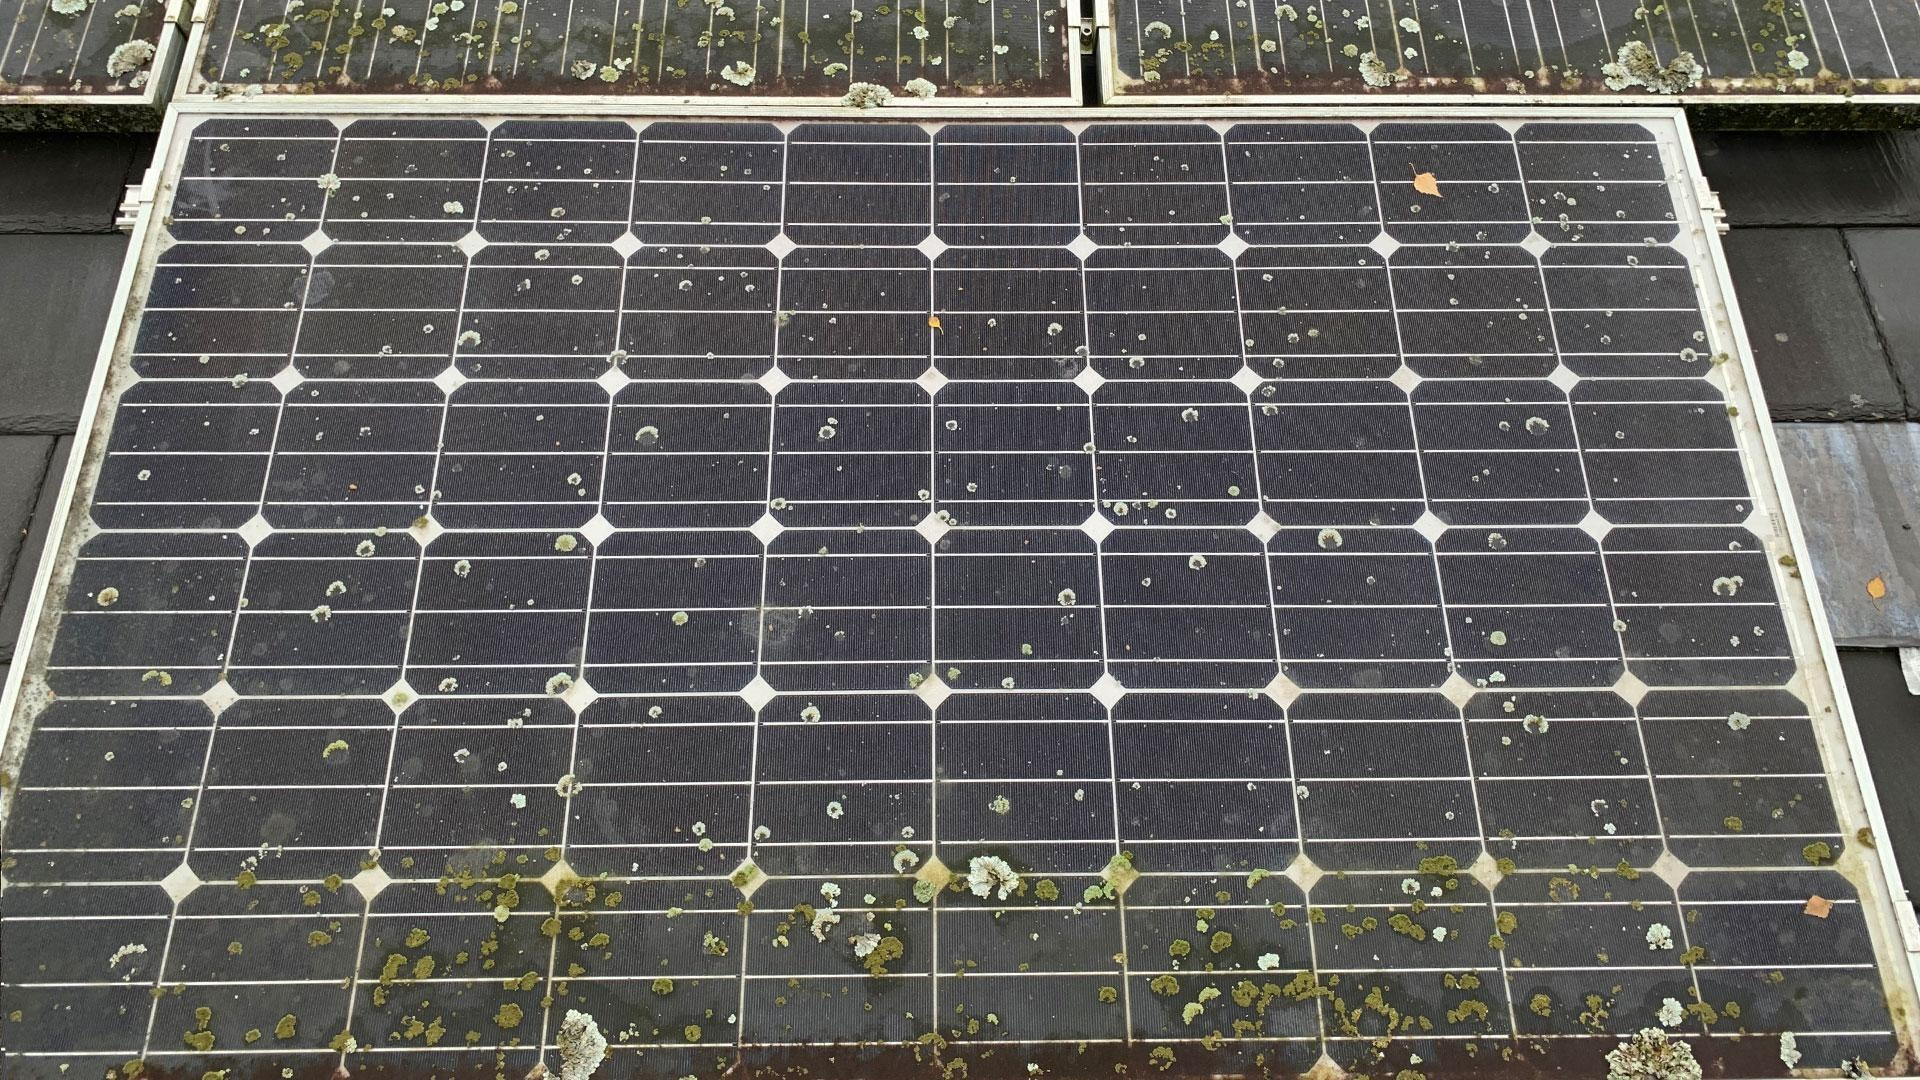

In [ ]:
#single image
from IPython.display import Image, display
import os

# Path to the output image
output_dir = "runs/detect/predict3"

# Show the image (only 1 in this case)
for file in os.listdir(output_dir):
    if file.endswith((".jpg", ".png")):
        display(Image(filename=os.path.join(output_dir, file)))
        break  # Just show one


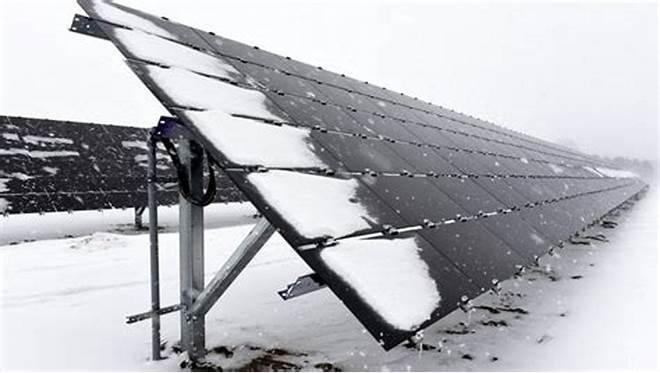

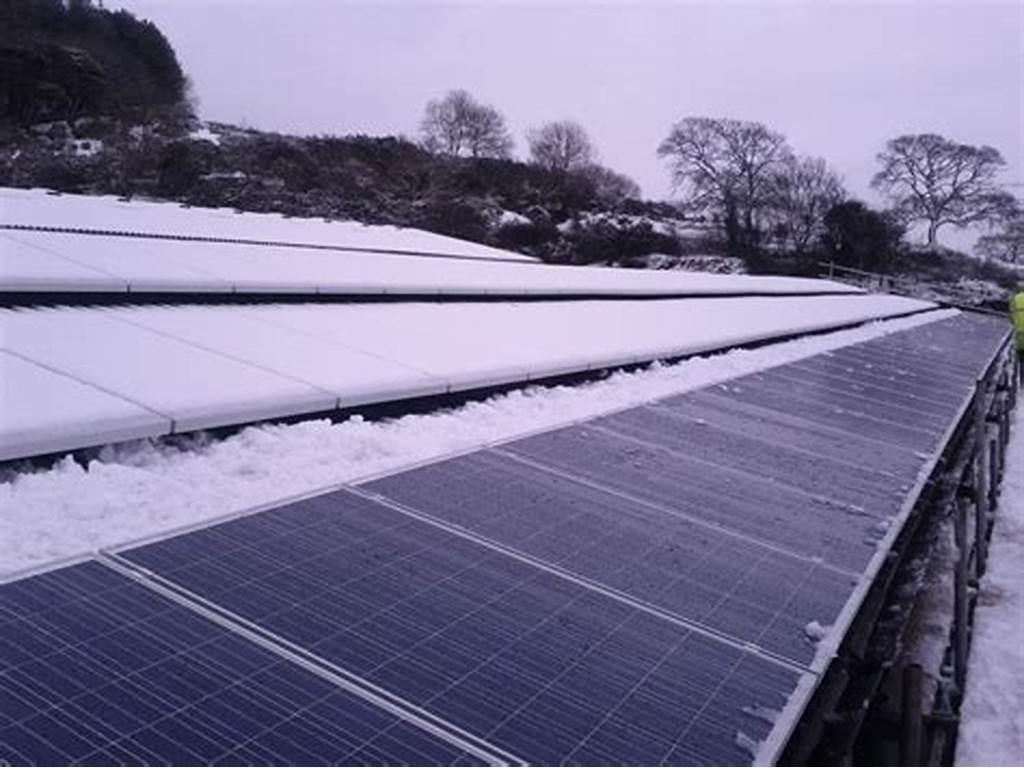

In [ ]:
#for folder
import os
from IPython.display import Image, display

# Directory where results are saved
output_dir = "runs/detect/predict"

# Show up to 5 images
for i, file in enumerate(os.listdir(output_dir)):
    if file.endswith(".jpg") or file.endswith(".png"):
        display(Image(filename=os.path.join(output_dir, file)))
    if i == 1:
        break


In [ ]:
# ----------------------------------
# 📊 Evaluation on validation or test set
# ----------------------------------
data_yaml = "path/to/data.yaml"  # 👈 replace this with the path to your data.yaml
metrics = model.val(data=data_yaml, split='val')  # or split='test' if you want test set

# Print core metrics
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.p:.4f}")
print(f"Recall: {metrics.box.r:.4f}")


In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/solar_panel_yolov8m2/weights/best.pt")

# Inference on a single image
results = model("path/to/image.jpg", save=True, conf=0.25)

# Inference on a folder of images
results = model("path/to/folder", save=True, conf=0.25)


In [ ]:
from ultralytics import YOLO

# Load the trained model correctly using a string path
model = YOLO("runs/detect/solar_panel_yolov8m/weights/best.pt")

# Evaluate the model on validation set
metrics = model.val()

# Print evaluation metrics
print("mAP@0.5: ", metrics.box.map50)
print("mAP@0.5:0.95: ", metrics.box.map)


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/solar_panel_yolov8m/weights/best.pt'

YOLOV8S


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

# Load pre-trained YOLOv8s model
model_s = YOLO("yolov8s.pt")


In [ ]:
from ultralytics import YOLO

# Load YOLOv8s architecture
model_s = YOLO("yolov8s.pt")

# Train the model
model_s.train(
    data="/content/yolo_roboflow/data.yaml",  # path to your data.yaml
    epochs=80,                 # number of training epochs
    imgsz=640,                 # image size
    batch=16,                  # batch size (adjust based on GPU)
    name="yolov8s" # experiment name
)


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_roboflow/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

train: Scanning /content/yolo_roboflow/train/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1233.1±778.7 MB/s, size: 400.0 KB)


val: Scanning /content/yolo_roboflow/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8s2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8s2
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80         0G      3.067      12.24      3.153         33        640: 100%|██████████| 5/5 [03:49<00:00, 45.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.150s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:23<00:00, 23.65s/it]

                   all         23         23      0.011     0.0238    0.00796   0.000796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
import os

# List all YOLOv8 runs
print(os.listdir("runs/detect"))


['yolov8s', 'yolov8s2', 'yolov8s3']


In [ ]:

print(os.listdir("runs/detect/yolov8s2"))


['weights', 'args.yaml']


1. View Training Performance

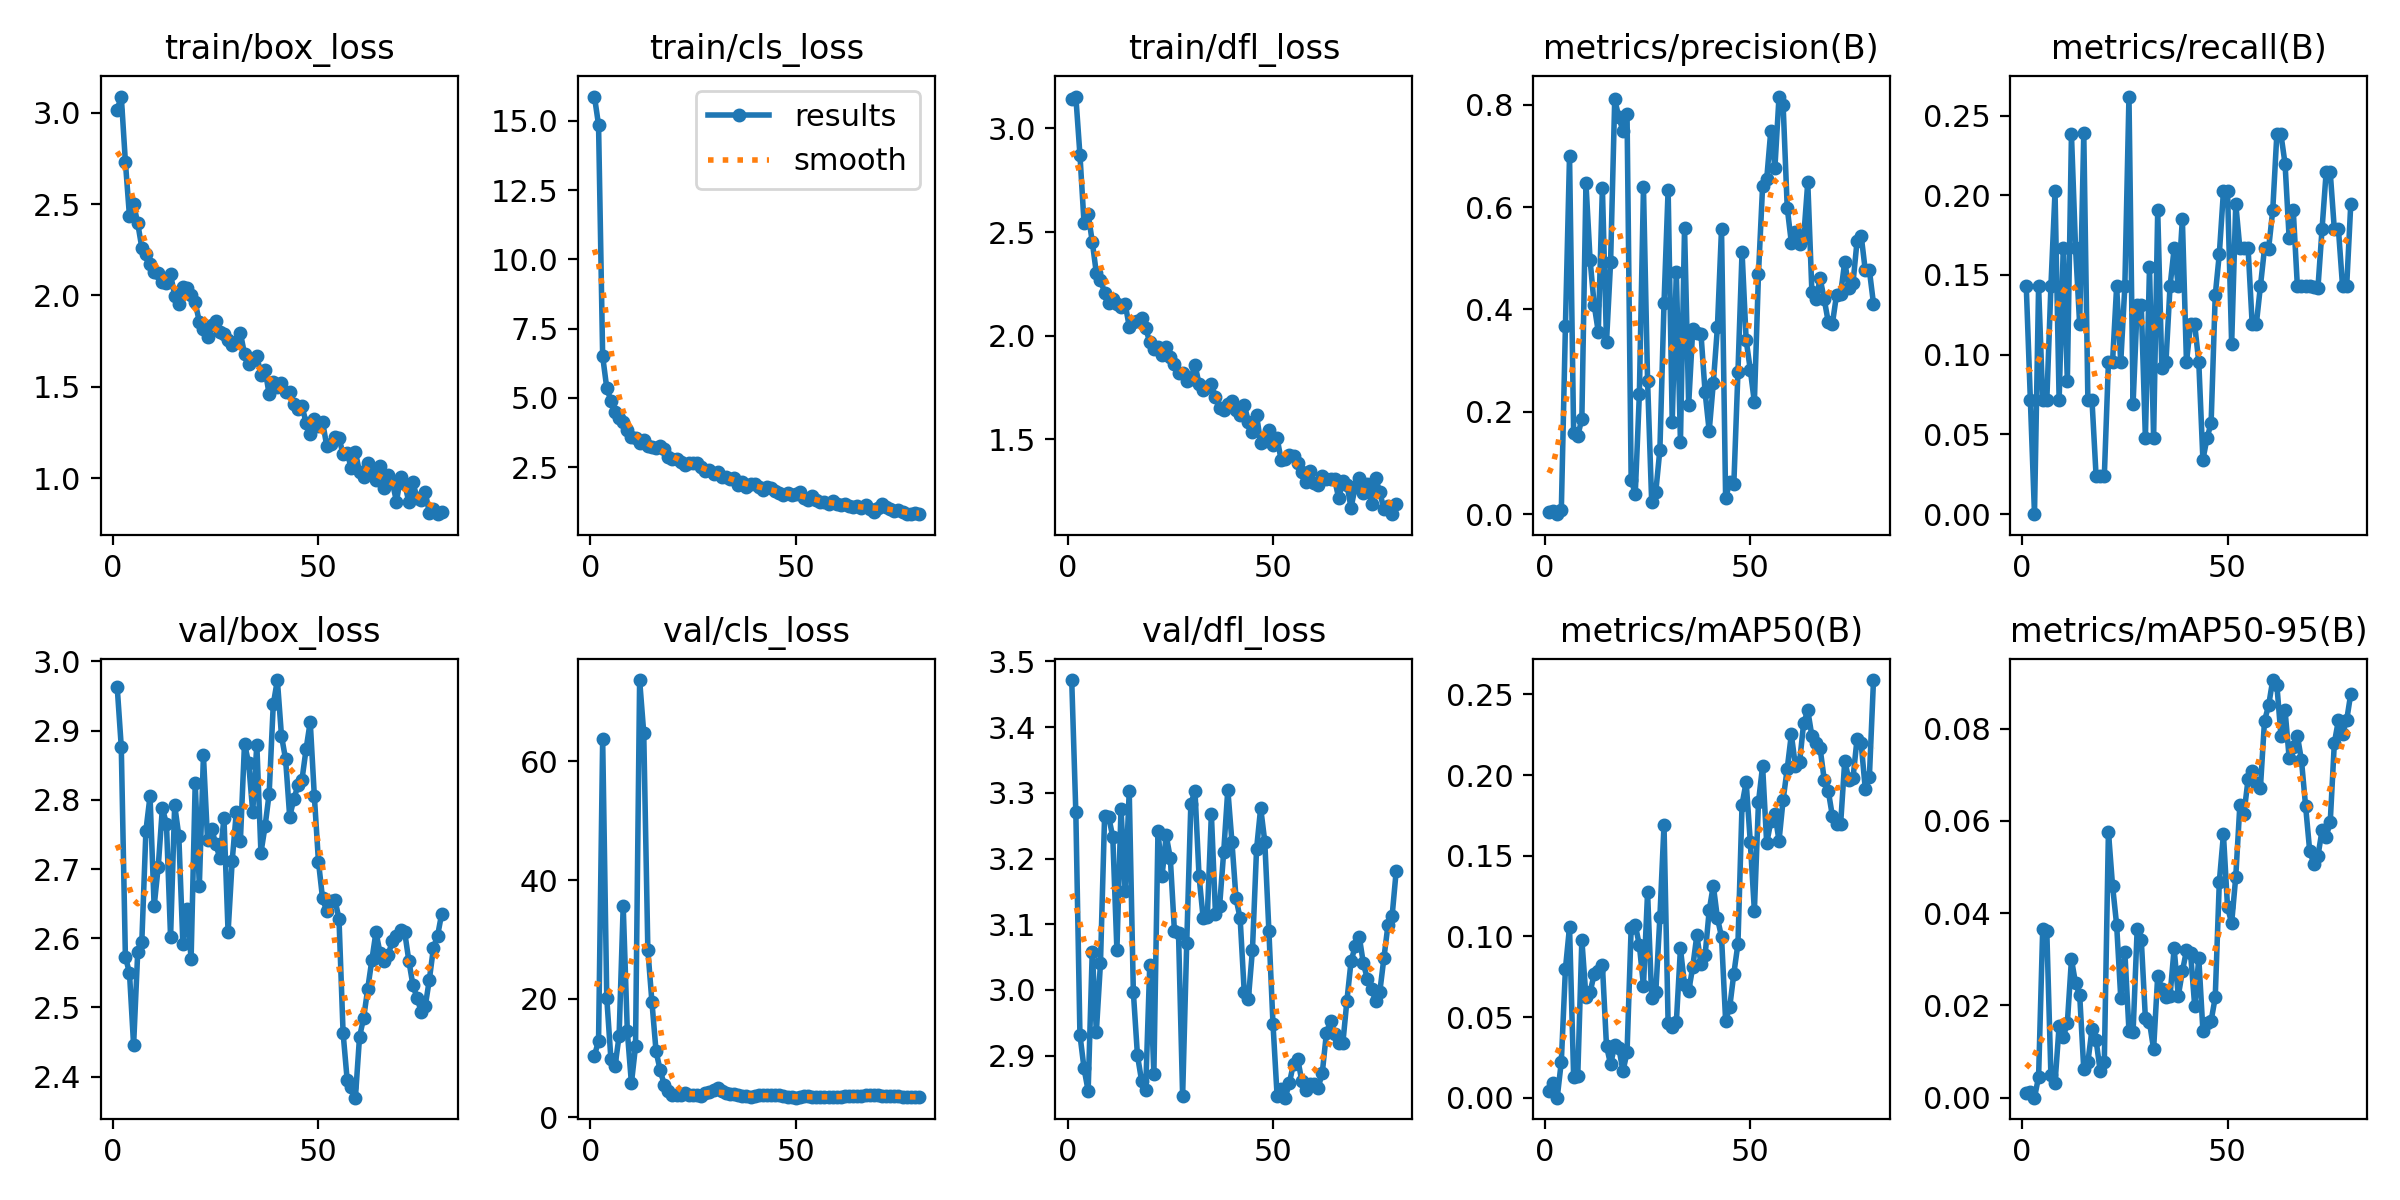

In [ ]:
from IPython.display import Image, display
display(Image(filename="runs/detect/yolov8s3/results.png"))


 2. View Confusion Matrix

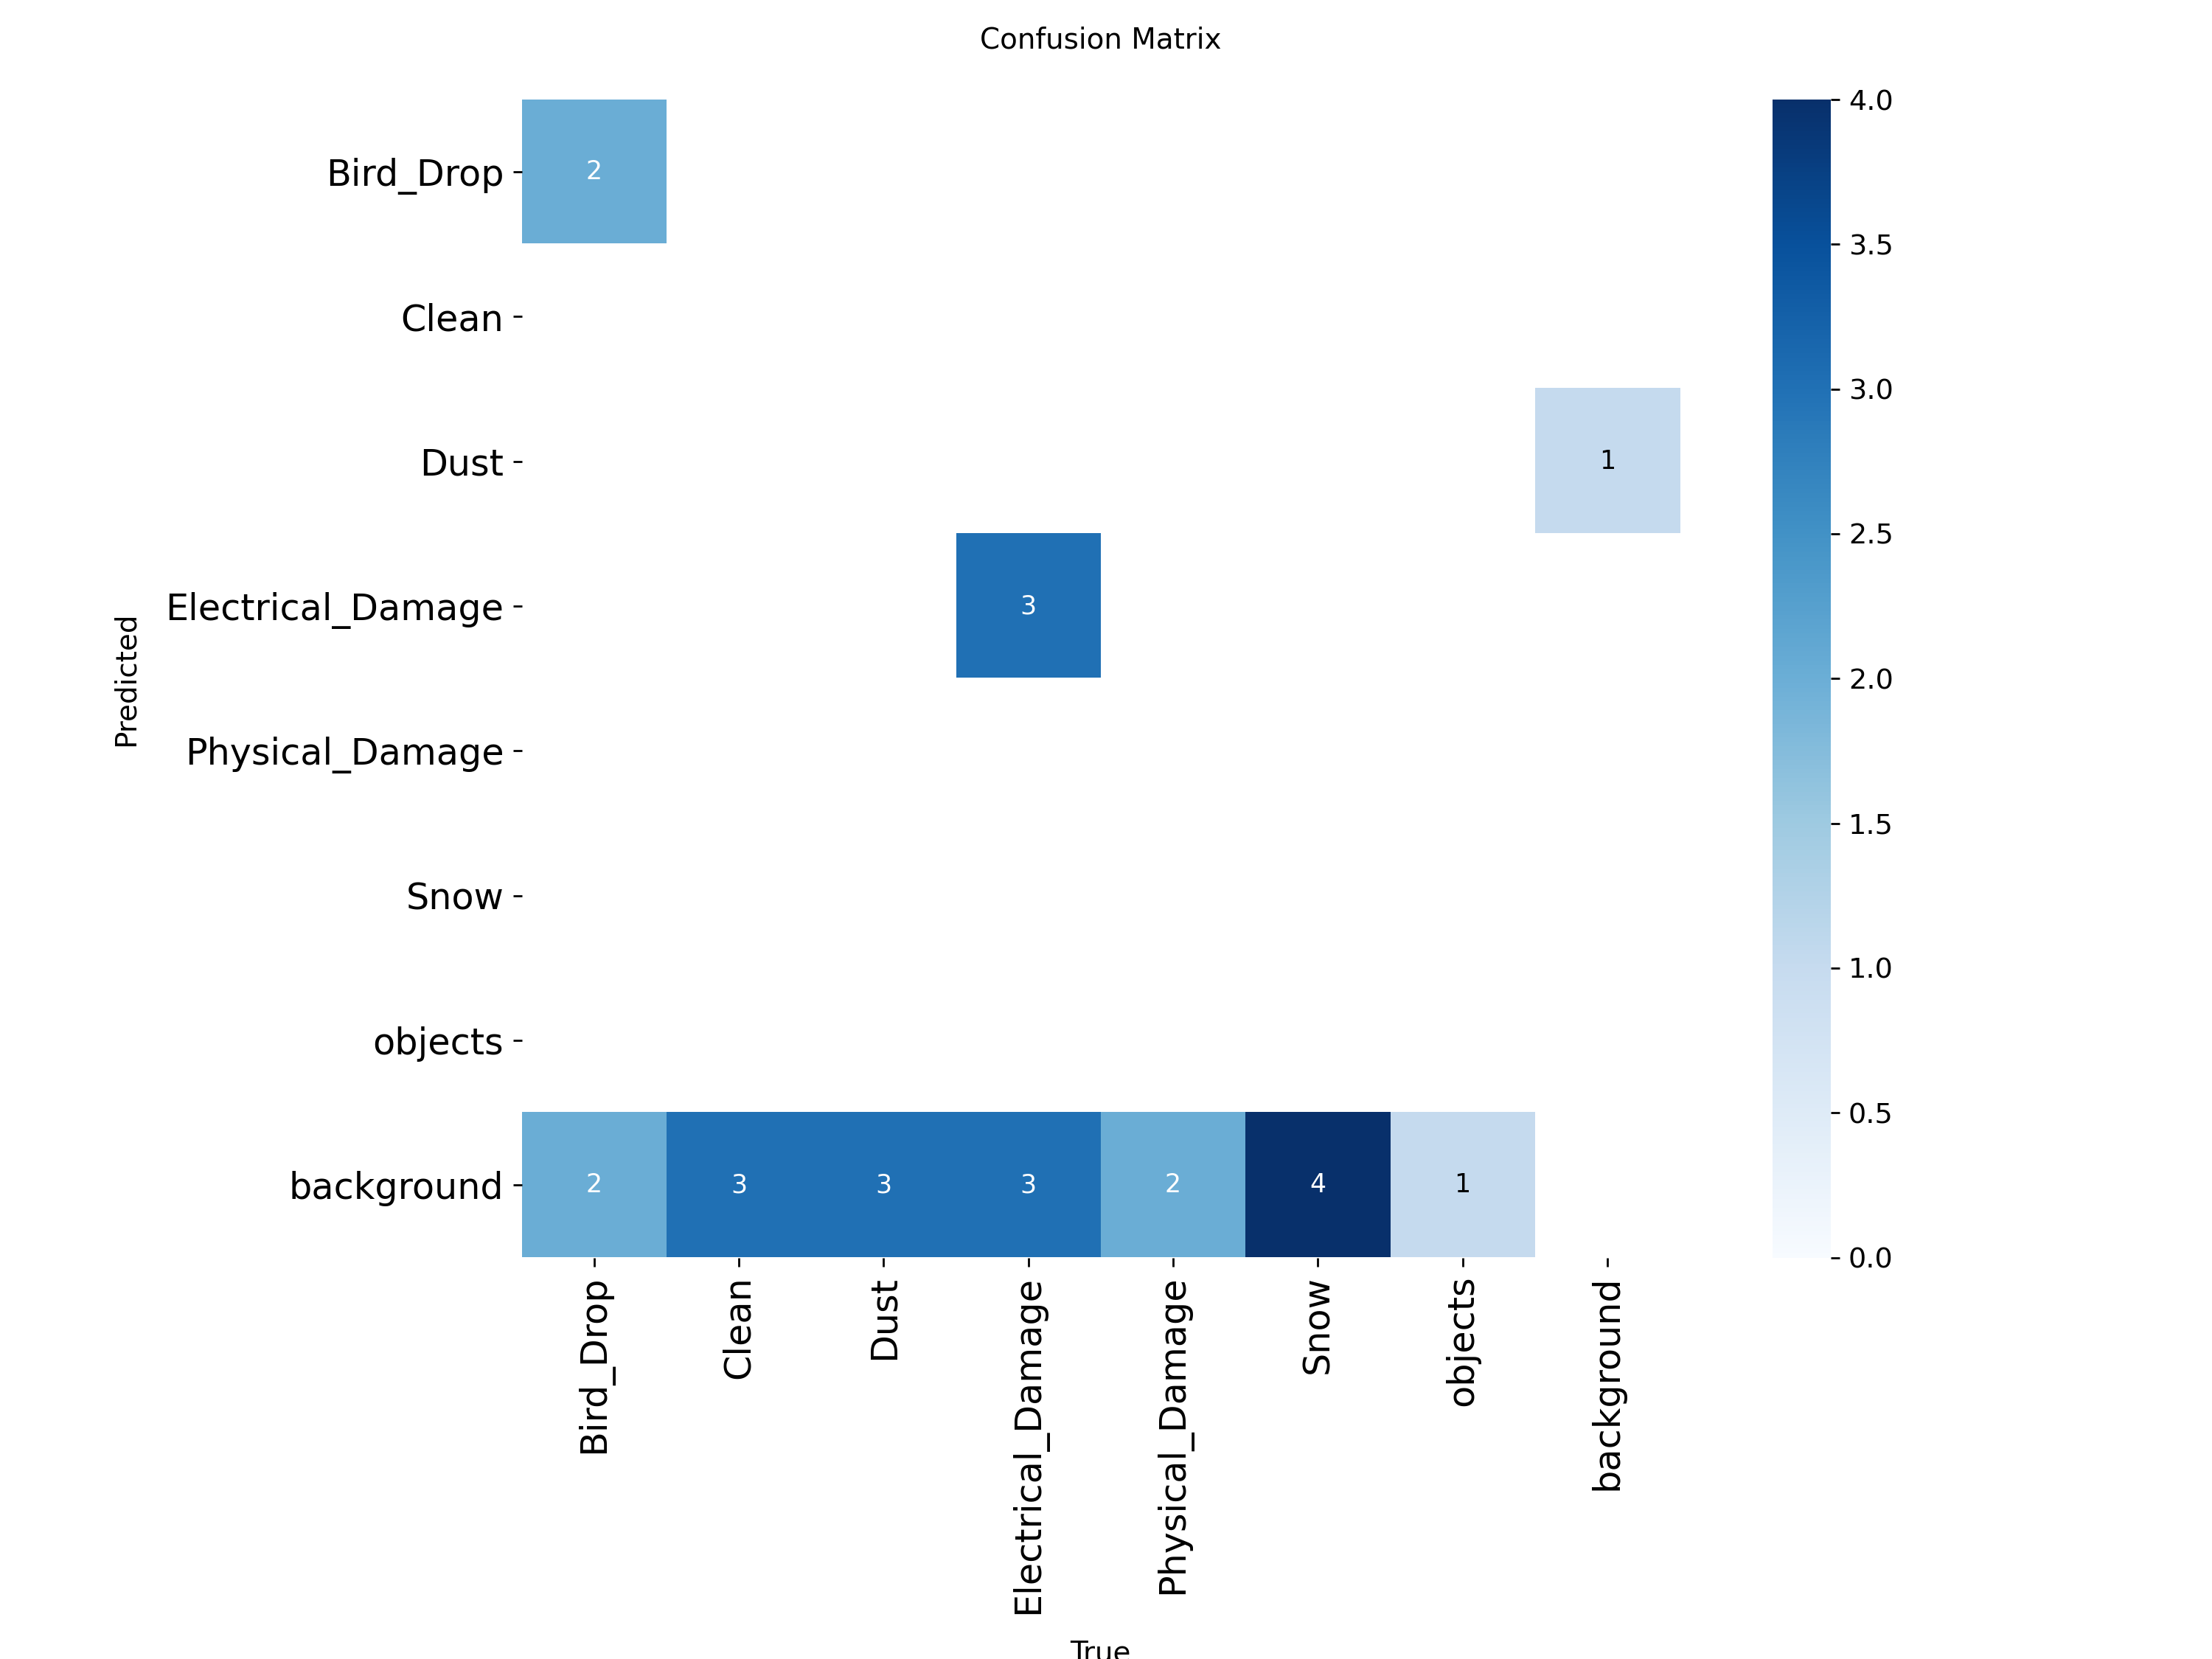

In [ ]:
display(Image(filename="runs/detect/yolov8s3/confusion_matrix.png"))


 3. Load and Use the Trained Model

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO
model_d = YOLO("/content/drive/MyDrive/best.pt")

In [ ]:
from ultralytics import YOLO
model_s = YOLO("runs/detect/yolov8s3/weights/best.pt")


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/yolov8s3/weights/best.pt'

Evaluate

In [ ]:
from google.colab import files

# Path to your trained YOLOv8s model
model_path = "runs/detect/yolov8s3/weights/best.pt"

# Download it to your local system
files.download(model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
metrics = model_d.val(data="/content/yolo_roboflow/data.yaml")
print(metrics)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1121.9±853.1 MB/s, size: 384.0 KB)


val: Scanning /content/yolo_roboflow/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.61s/it]


                   all         23         23      0.521      0.143      0.203     0.0742
             Bird_Drop          4          4          0          0     0.0398     0.0103
                 Clean          3          3          1          0      0.287     0.0995
                  Dust          3          3          0          0      0.048     0.0076
     Electrical_Damage          6          6      0.825        0.5      0.546      0.153
       Physical_Damage          2          2      0.818        0.5      0.499      0.249
                  Snow          4          4          1          0          0          0
               objects          1          1          0          0          0          0
Speed: 13.3ms preprocess, 962.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix:

In [ ]:
model_s.val(data="/content/yolo_roboflow/data.yaml", split="val")  # or split='test'


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 607.7±102.1 MB/s, size: 20.0 KB)


val: Scanning /content/yolo_roboflow/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]


                   all         23         23      0.521      0.143      0.203     0.0742
             Bird_Drop          4          4          0          0     0.0398     0.0103
                 Clean          3          3          1          0      0.287     0.0995
                  Dust          3          3          0          0      0.048     0.0076
     Electrical_Damage          6          6      0.825        0.5      0.546      0.153
       Physical_Damage          2          2      0.818        0.5      0.499      0.249
                  Snow          4          4          1          0          0          0
               objects          1          1          0          0          0          0
Speed: 8.4ms preprocess, 18.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7828e3bd7b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

Inference

In [ ]:
model_s.predict("/content/yolo_roboflow/test/images/Dust-166-_jpg.rf.76b29be5e8b0967be5026d22a906c900.jpg", save=True, conf=0.25)



image 1/1 /content/yolo_roboflow/test/images/Dust-166-_jpg.rf.76b29be5e8b0967be5026d22a906c900.jpg: 448x640 (no detections), 41.5ms
Speed: 2.9ms preprocess, 41.5ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bird_Drop', 1: 'Clean', 2: 'Dust', 3: 'Electrical_Damage', 4: 'Physical_Damage', 5: 'Snow', 6: 'objects'}
 obb: None
 orig_img: array([[[165, 170, 169],
         [165, 170, 169],
         [165, 170, 169],
         ...,
         [164, 166, 166],
         [163, 165, 165],
         [164, 166, 166]],
 
        [[164, 169, 168],
         [164, 169, 168],
         [165, 170, 169],
         ...,
         [158, 160, 160],
         [159, 161, 161],
         [160, 162, 162]],
 
        [[174, 179, 178],
         [173, 178, 177],
         [172, 177, 176],
         ...,
         [154, 156, 156],
         [155, 157, 157],
         [157, 159, 159]],
 
        ...,
 
        [[103,  98,  95],
         [102,  97,  94],
         [108, 103, 100],
         ...,
         [131, 120, 116],
         [101,  90,  86],
         [ 97,  86,  82]],
 
        [[109

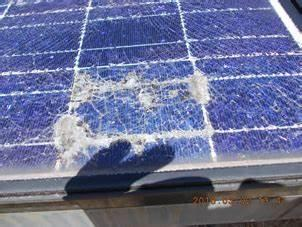

In [ ]:
from IPython.display import Image, display
import os

# Path to YOLO output folder
folder = "runs/detect/predict4"

# Just the filename (same name used in input)
filename = "/content/yolo_roboflow/test/images/Physical-46-_jpg.rf.10fdce03b7d50cb0e98f035f35cdc569.jpg"

# Display predicted image
display(Image(filename=os.path.join(folder, filename)))


In [ ]:
results = model_s.predict(
    "/content/yolo_roboflow/test/images/Physical-46-_jpg.rf.10fdce03b7d50cb0e98f035f35cdc569.jpg",
    conf=0.25
)



image 1/1 /content/yolo_roboflow/test/images/Physical-46-_jpg.rf.10fdce03b7d50cb0e98f035f35cdc569.jpg: 512x640 (no detections), 43.7ms
Speed: 3.1ms preprocess, 43.7ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


In [ ]:
# results is a list with one result object
for result in results:
    boxes = result.boxes  # Boxes object with .cls and .conf
    for cls, conf in zip(boxes.cls, boxes.conf):
        class_id = int(cls.item())
        confidence = conf.item()
        class_name = model.names[class_id]
        print(f"Detected class: {class_name}, Confidence: {confidence:.2f}")


In [ ]:
results = model_s.predict(
    "/content/yolo_roboflow/test/images/Physical-46-_jpg.rf.10fdce03b7d50cb0e98f035f35cdc569.jpg",
    conf=0.01
)

for result in results:
    if result.boxes:
        for cls, conf in zip(result.boxes.cls, result.boxes.conf):
            class_id = int(cls.item())
            confidence = conf.item()
            class_name = model_s.names[class_id]
            print(f"Detected class: {class_name}, Confidence: {confidence:.2f}")
    else:
        print("❌ No detections made.")



image 1/1 /content/yolo_roboflow/test/images/Physical-46-_jpg.rf.10fdce03b7d50cb0e98f035f35cdc569.jpg: 512x640 2 Electrical_Damages, 4 Physical_Damages, 15.7ms
Speed: 7.3ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 512, 640)
Detected class: Electrical_Damage, Confidence: 0.14
Detected class: Physical_Damage, Confidence: 0.05
Detected class: Physical_Damage, Confidence: 0.03
Detected class: Physical_Damage, Confidence: 0.02
Detected class: Physical_Damage, Confidence: 0.02
Detected class: Electrical_Damage, Confidence: 0.01
